In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hearth.csv',skiprows = 19)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
1,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
2,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative
3,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,negative
4,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,negative


In [3]:
df["dummy_num"]=df["num"].replace({"negative":0, "positive":1})
df=df.replace({"<null>":np.nan})

In [4]:
pd.set_option('display.max_rows', None)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,dummy_num
0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative,0
1,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative,0
2,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative,0
3,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,negative,0
4,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,negative,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        175 non-null    float64
 1   sex        175 non-null    float64
 2   cp         175 non-null    float64
 3   trestbps   175 non-null    float64
 4   chol       175 non-null    float64
 5   fbs        175 non-null    float64
 6   restecg    175 non-null    float64
 7   thalach    175 non-null    float64
 8   exang      175 non-null    float64
 9   oldpeak    175 non-null    float64
 10  slope      175 non-null    float64
 11  ca         172 non-null    object 
 12  thal       174 non-null    object 
 13  num        175 non-null    object 
 14  dummy_num  175 non-null    int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 20.6+ KB


In [6]:
df.drop(columns=['num'], inplace=True)

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           3
thal         1
dummy_num    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
Y=df["dummy_num"]
X=df.drop("dummy_num", axis=1)

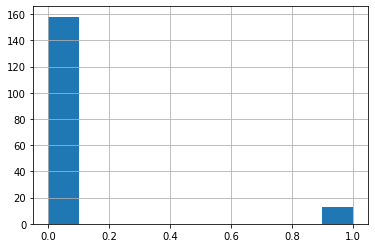

In [10]:
df.dummy_num.hist()

In [11]:
def create_model(X, Y):
    X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    prediction_train = logreg_model.predict(X_train)
    prediction_test = logreg_model.predict(X_test)
    error_matris_train = confusion_matrix(y_train, prediction_train)
    error_matris_test = confusion_matrix(y_test, prediction_test)
    print("Model Accuracy : ",  logreg_model.score(X_test, y_test))
    print("train dataset")
    print(classification_report(y_train,prediction_train) )
    print("Test dataset")
    print(classification_report(y_test,prediction_test) )
    return  None

In [12]:
create_model(X,Y)

Model Accuracy :  0.9142857142857143
train dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       126
           1       0.88      0.70      0.78        10

    accuracy                           0.97       136
   macro avg       0.93      0.85      0.88       136
weighted avg       0.97      0.97      0.97       136

Test dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.50      0.33      0.40         3

    accuracy                           0.91        35
   macro avg       0.72      0.65      0.68        35
weighted avg       0.90      0.91      0.91        35



In [13]:
sick = df[df.dummy_num == 1]
healthy = df[df.dummy_num == 0]

print('Healthy Count:', len(healthy),'\n'
      'Sick Count:', len(sick))

Healthy Count: 158 
Sick Count: 13


In [14]:
sick_inc = resample(sick,
                       replace = True,
                       n_samples = len(healthy),
                       random_state = 11)
df_inc = pd.concat([healthy, sick_inc])
df_inc.dummy_num.value_counts()

1    158
0    158
Name: dummy_num, dtype: int64

In [15]:
create_model(df_inc.drop('dummy_num', axis = 1), df_inc.dummy_num)

Model Accuracy :  0.9375
train dataset
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       126
           1       0.97      1.00      0.98       126

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252

Test dataset
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.89      1.00      0.94        32

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



In [16]:
Y=df["dummy_num"]
X=df.drop("dummy_num", axis=1)
sm = SMOTE(random_state = 27)
X_smote, Y_smote = sm.fit_sample(X,Y)

In [17]:
create_model(X_smote, Y_smote)

Model Accuracy :  0.921875
train dataset
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       126
           1       0.98      1.00      0.99       126

    accuracy                           0.99       252
   macro avg       0.99      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252

Test dataset
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.89      0.97      0.93        32

    accuracy                           0.92        64
   macro avg       0.93      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64



In [18]:
ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, Y)

In [19]:
create_model(X_adasyn, y_adasyn)

Model Accuracy :  0.9375
train dataset
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       126
           1       0.98      1.00      0.99       127

    accuracy                           0.99       253
   macro avg       0.99      0.99      0.99       253
weighted avg       0.99      0.99      0.99       253

Test dataset
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.89      1.00      0.94        32

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



## Results

Best model accuracy; SMOTE - 0.96875 

Best precision; Imbalanced Dataset - 1.0 (SMOTE 0.94)

Best recall; SMOTE & Increased Resampling - 1.0

Best f1 score; SMOTE - 0.97
